In [16]:
import keras
import matplotlib.pyplot as plt
import seaborn as sn
import os 
import cv2
import numpy as np
import random
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
import tensorflow.keras as keras

from scikeras.wrappers import KerasClassifier

import keras.backend as K
from sklearn.datasets import make_multilabel_classification
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Loading the dataset and getting info about it

In [17]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = r"C:\Users\jofin\Desktop\Prodigy\prodigy_ml_01\PRODIGY_ML_01\PRODIGY_ML_04\leapGestRecog\leapGestRecog"


In [18]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [19]:
random.shuffle(image_data)

In [20]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[6, 6, 7, ..., 3, 5, 5],
        [5, 5, 8, ..., 4, 5, 4],
        [5, 6, 8, ..., 5, 4, 4],
        ...,
        [6, 7, 7, ..., 5, 6, 5],
        [7, 6, 7, ..., 4, 5, 4],
        [6, 6, 7, ..., 4, 5, 5]], dtype=uint8),
 array([[4, 7, 4, ..., 5, 3, 4],
        [4, 5, 5, ..., 4, 4, 3],
        [5, 6, 5, ..., 5, 4, 4],
        ...,
        [3, 5, 5, ..., 5, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [5, 3, 4, ..., 4, 3, 3]], dtype=uint8),
 array([[6, 6, 6, ..., 6, 6, 5],
        [5, 6, 5, ..., 6, 6, 4],
        [6, 6, 6, ..., 6, 6, 4],
        ...,
        [6, 6, 5, ..., 9, 8, 6],
        [5, 5, 5, ..., 8, 8, 6],
        [5, 5, 6, ..., 6, 6, 5]], dtype=uint8),
 array([[ 4,  6,  5, ...,  4,  4,  5],
        [ 5,  5,  5, ...,  3,  4,  3],
        [ 5,  5,  5, ...,  3,  4,  2],
        ...,
        [ 8,  8, 11, ...,  4,  4,  4],
        [ 9,  8, 11, ...,  2,  3,  3],
        [ 6,  9, 10, ...,  4,  5,  3]], dtype=uint8),
 array([[ 5,  4,  4, ...,  3,  4,  5],
        [ 4,  4,  4, 

### Visualizing Data

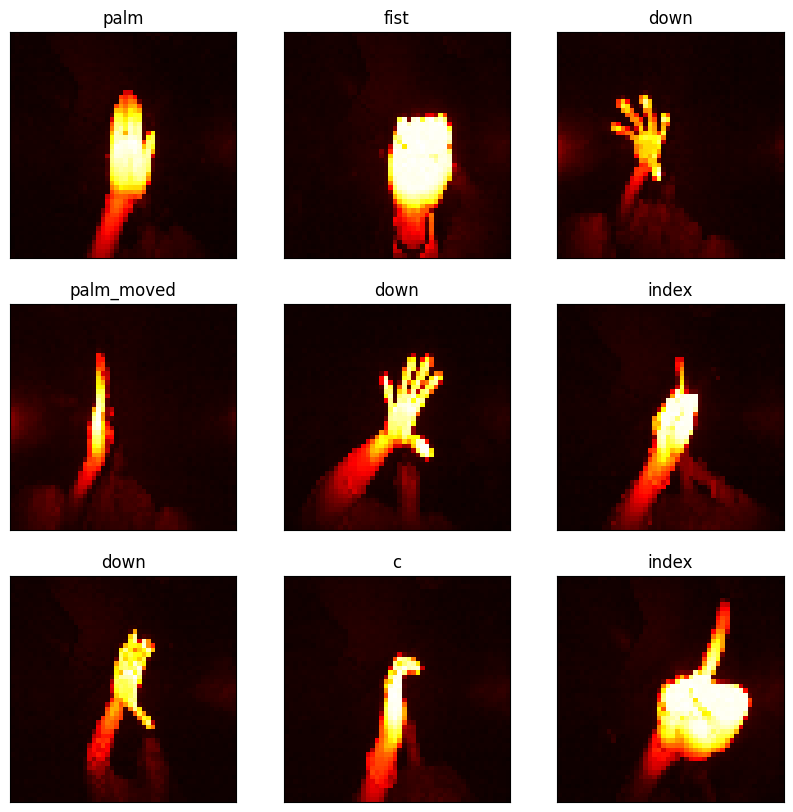

In [21]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

### Normalizing the data

In [22]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

### Making multilabel classifier

In [23]:
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)

In [24]:
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [25]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

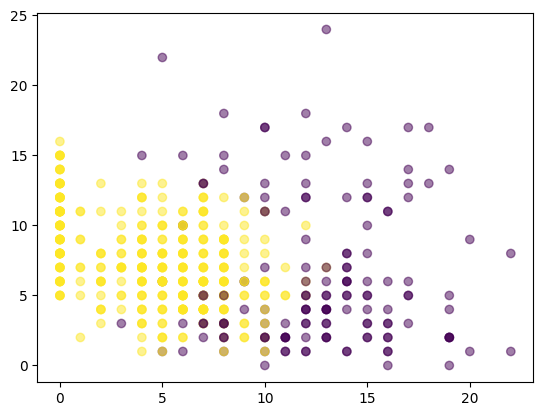

In [26]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [27]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

### One Hot Encoding

In [28]:
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

### Separating features and Spiting Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50), (18000, 10), (2000, 50, 50), (2000, 10))

### Model Traning and Prediction

In [30]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])

c:\Users\jofin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.7545 - loss: 0.7153 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 2/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step - accuracy: 0.9945 - loss: 0.0198 - val_accuracy: 0.9990 - val_loss: 0.0035
Epoch 3/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - accuracy: 0.9974 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 6.5082e-05
Epoch 4/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.9983 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 1.1968e-05
Epoch 5/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 4.9489e-05
Epoch 6/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 6.5624e-06
Epoch 7/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.2171e-04


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

### Model Loss

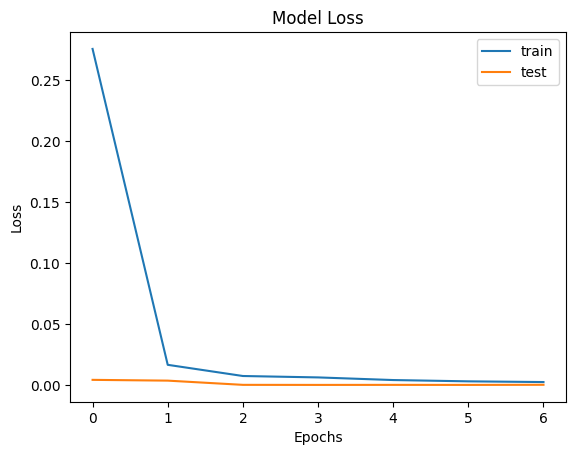

In [33]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Model Accuracy

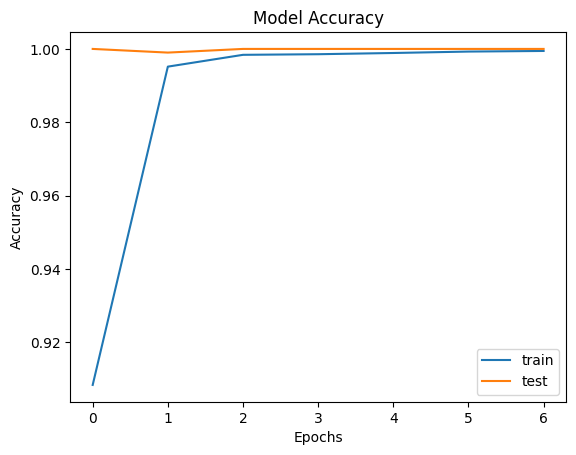

In [34]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 1.7013e-04
Test accuracy: 100.00%


In [36]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print('Train accuracy: {:2.2f}%'.format(train_accuracy*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9999 - loss: 2.6680e-04
Train accuracy: 99.99%


### Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[]

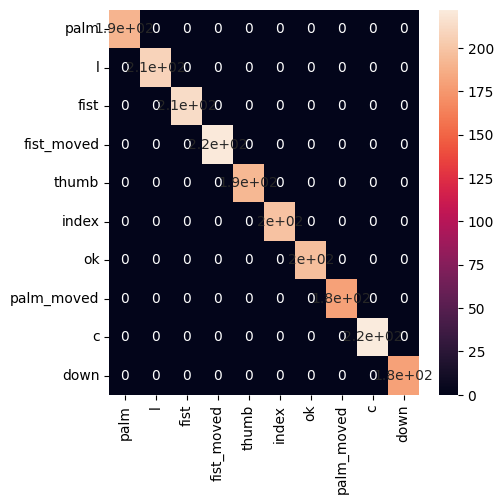

In [37]:
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step


[]

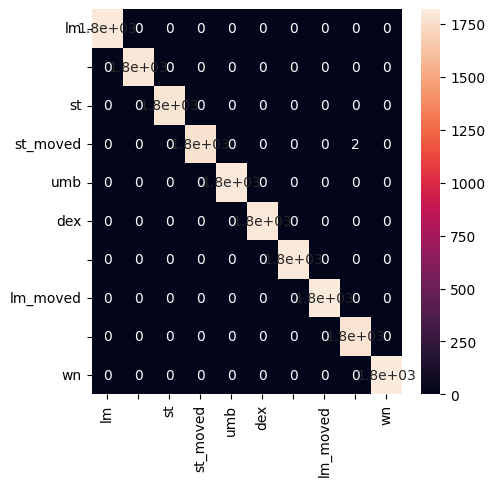

In [38]:
cat = [c[5:] for c in CATEGORIES]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()